In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dfobservations = pd.read_csv('observations.csv')
dfspecies = pd.read_csv('species_info.csv')

In [2]:
dfspecies.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
dfobservations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
df = pd.merge(dfobservations, dfspecies, on='scientific_name')
df

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,NaN
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN


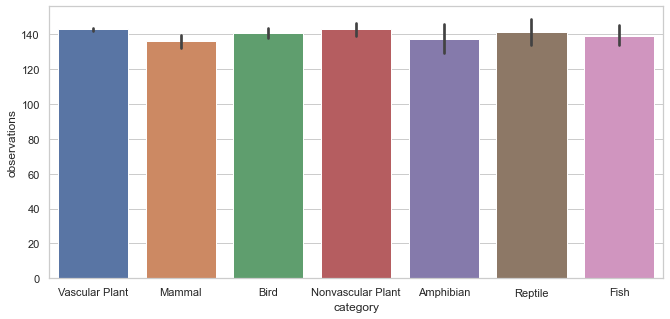

In [5]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(11, 5))
sns.barplot(x="category", y="observations", data=df)
plt.show()

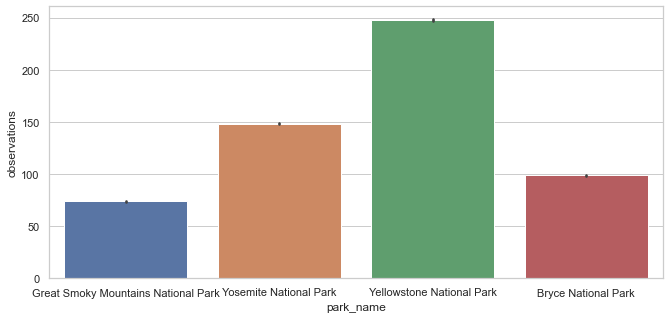

In [6]:
plt.subplots(figsize=(11, 5))
sns.barplot(x="park_name", y="observations", data=df)
plt.show()

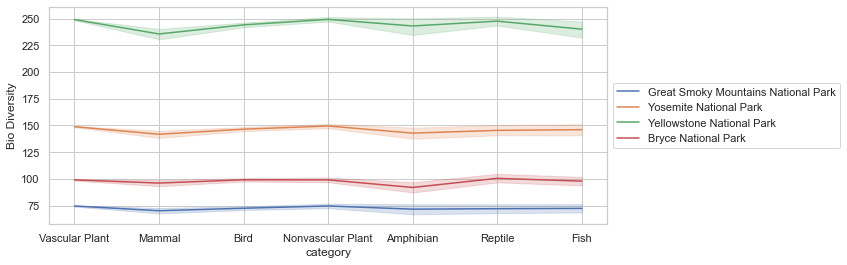

In [7]:
plt.figure(figsize=(10,4))
sns.lineplot(x=df.category, y=df.observations, hue=df.park_name)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Bio Diversity");

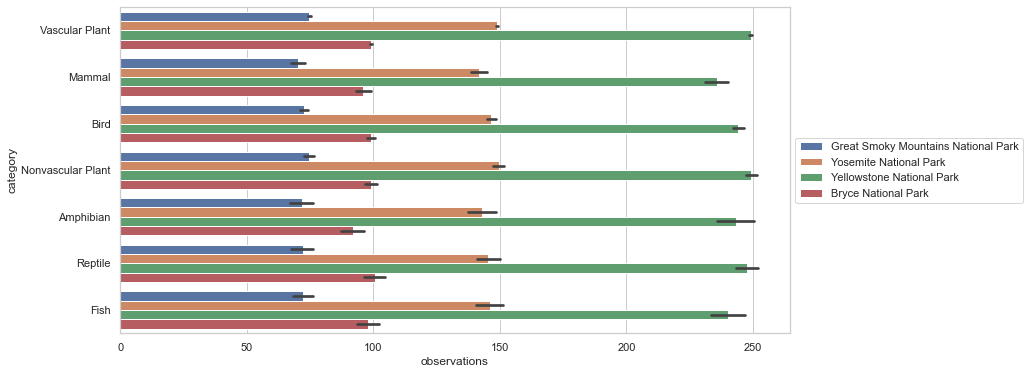

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.observations, y=df.category, hue=df.park_name).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.show()

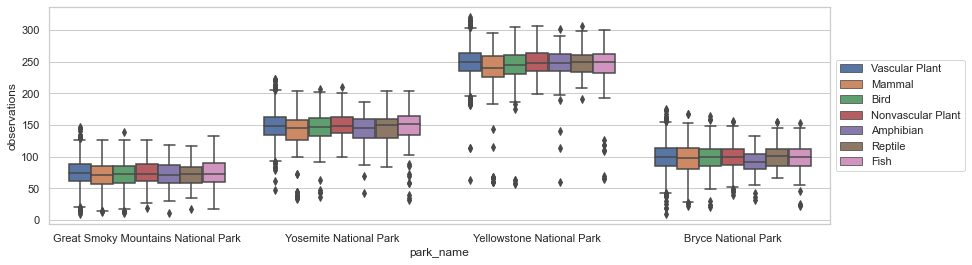

In [12]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df.park_name, y=df.observations, hue=df.category).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);